In [9]:
library(CellChat)
library(anndata)
library(reticulate)
library(Matrix)
library(Seurat)
library(SeuratDisk)
library(NMF)
library(ggalluvial)
library(ComplexHeatmap)
library(patchwork)
library(graphics)
options(stringsAsFactors = FALSE)
library(glue)
args = commandArgs(trailingOnly=TRUE)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:circlize’:

    degree


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Sugge

In [2]:
file <- '/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/AMP-AD_ROSMAP_annotated.h5ad'
file

[1] "/extra/zhanglab0/CommonData/AMP-AD/AMP-AD_restricted/AMP-AD_ROSMAP_annotated.h5ad"

In [3]:
cellchat = read_h5ad(file)

In [4]:
cellchat

AnnData object with n_obs × n_vars = 63942 × 32270
    obs: 'n_genes', 'n_counts', 'Channel', 'anno', 'subclass', 'azimuth', 'sampleID', 'individualID'
    var: 'featureid', 'n_cells', 'percent_cells'
    uns: 'PCs', '_attr2type', 'genome', 'leiden_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std', 'uns_dict', 'var_dict'
    obsm: 'X_pca', 'X_pca_harmony', 'X_pca_regressed', 'X_pca_regressed_harmony', 'X_umap', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices', 'pca_regressed_harmony_knn_distances', 'pca_regressed_harmony_knn_indices'
    varm: 'de_res', 'means', 'partial_sum'
    obsp: 'W_pca_harmony', 'W_pca_regressed_harmony'

In [5]:
unique(cellchat$obs$subclass)

[1] L2/3 IT    L6 IT      L6b        L5 IT      L6 IT Car3 L4 IT     
 [7] L6 CT      Pvalb      Sst Chodl  Sst        Vip        Lamp5 Lhx6
[13] Chandelier Astro      OPC        Micro/PVM  Lamp5      Pax6      
[19] Oligo      Sncg       VLMC       L5 ET      Endo       L5/6 NP   
24 Levels: Astro Chandelier Endo L2/3 IT L4 IT L5 ET L5 IT L5/6 NP ... Vip

In [6]:
a <- cellchat$obs$subclass
a <- gsub('L2/3 IT', 'excit_l2_3',a)
a <- gsub('L4 IT', 'excit_l4',a)
a <- gsub('OPC', 'opc',a)
a <- gsub('Astro', 'astro',a)
a <- gsub('Endo', 'endomural',a)
a <- gsub('L5/6 NP', 'excit_l5_6',a)
a <- gsub('Micro/PVM', 'micro',a)
a <- gsub('Oligo', 'oligo',a)
a <- gsub('L5 ET', 'excit_l5',a)
a <- gsub('L5 IT', 'excit_l5',a)
a <- gsub('L5', 'excit_l5',a)
a <- gsub('L6 IT Car3', 'excite_l6',a)
a <- gsub('L6 IT', 'excite_l6',a)
a <- gsub('L6 CT', 'excite_l6',a)
a <- gsub('L6b', 'excite_l6',a)
a <- gsub('VLMC', 'endomural',a)
a <- gsub('Chandelier', 'inhib',a)
a <- gsub('Lamp5 Lhx6', 'inhib',a)
a <- gsub('Lamp5', 'inhib',a)
a <- gsub('Pax6', 'inhib',a)
a <- gsub('Pvalb', 'inhib',a)
a <- gsub('Sst Chodl', 'inhib',a)
a <- gsub('Sncg', 'inhib',a)
a <- gsub('Sst', 'inhib',a)
a <- gsub('Vip', 'inhib',a)
unique(a)

[1] "excit_l2_3" "excite_l6"  "excit_l5"   "excit_l4"   "inhib"     
 [6] "astro"      "opc"        "micro"      "oligo"      "endomural" 
[11] "excit_l5_6"

In [7]:
unique(cellchat$obs$subclass)

[1] L2/3 IT    L6 IT      L6b        L5 IT      L6 IT Car3 L4 IT     
 [7] L6 CT      Pvalb      Sst Chodl  Sst        Vip        Lamp5 Lhx6
[13] Chandelier Astro      OPC        Micro/PVM  Lamp5      Pax6      
[19] Oligo      Sncg       VLMC       L5 ET      Endo       L5/6 NP   
24 Levels: Astro Chandelier Endo L2/3 IT L4 IT L5 ET L5 IT L5/6 NP ... Vip

In [8]:
cellchat$obs$pooled <- a
cellchat$obs

,n_genes,n_counts,Channel,anno,subclass,azimuth,sampleID,individualID,pooled
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
D17-8753-TGCGCAGCATCGGGTC,10905,66946,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,excit_l2_3
D17-8753-CTCGAAACATCGACGC,10375,59114,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,excite_l6
D17-8753-TGCGCAGGTATCGCAT,10518,58903,D17-8753-,L5 ET,L6 IT,L6 IT,D17-8753,ROS13,excite_l6
D17-8753-GTTACAGCACATTAGC,10268,49493,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,excit_l2_3
D17-8753-TCCCGATCAATGTTGC,9969,48719,D17-8753-,L5 IT-5,L6 IT,L6 IT,D17-8753,ROS13,excite_l6
D17-8753-ACTGAACAGTGGCACA,9739,46728,D17-8753-,L6 IT-5,L6 IT,L6 IT,D17-8753,ROS13,excite_l6
D17-8753-GCAAACTAGCTGAAAT,9617,46443,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,excit_l2_3
D17-8753-TGACTTTTCAGTCCCT,9349,44799,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,excit_l2_3
D17-8753-TCGTACCCAGACAGGT,9256,42882,D17-8753-,L5 ET,L2/3 IT,L2/3 IT,D17-8753,ROS13,excit_l2_3


In [ ]:
cellchat$X

  [[ suppressing 32 column names ‘MIR1302-2HG’, ‘FAM138A’, ‘AL627309.1’ ... ]]

  [[ suppressing 32 column names ‘MIR1302-2HG’, ‘FAM138A’, ‘AL627309.1’ ... ]]

  [[ suppressing 32 column names ‘MIR1302-2HG’, ‘FAM138A’, ‘AL627309.1’ ... ]]



In [9]:
cellchat <- createCellChat(object = t(as(cellchat$X, 'CsparseMatrix')), meta = cellchat$obs, group.by = "pooled")

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  astro endomural excit_l2_3 excit_l4 excit_l5 excit_l5_6 excite_l6 inhib micro oligo opc 


In [11]:
cellchat

An object of class CellChat created from a single dataset 
 32270 genes.
 63942 cells. 
CellChat analysis of single cell RNA-seq data! 

In [12]:
# Parameter Tuning
# condition <- args[1]               # c("CON", "PTSD", "MDD")
# type <- args[2]                    # c("triMean", "truncatedMean", "thresholdedMean", "median")
# trim <- as.numeric(args[3])        # c(0.05, 0.10, 0.15, 0.20, 0.25)
condition <- c("CON", "PTSD", "MDD")
type <- "triMean"        #  c("triMean", "truncatedMean", "thresholdedMean", "median")
trim <- 0.1              #c(0.05, 0.10, 0.15, 0.20, 0.25)

#choose database
CellChatDB <- CellChatDB.human
CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling") # use Secreted Signaling
#set the used database in the object
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat)

In [13]:
#do parallel
library(future)
options(future.globals.maxSize = +Inf)
future::plan("multicore", workers = 16)

#analysis
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)


Attaching package: ‘future’


The following object is masked from ‘package:NMF’:

    run


The following objects are masked from ‘package:igraph’:

    %->%, %<-%




In [14]:
#create cellchat object
# cellchat <- createCellChat(object = data.input, meta = meta, group.by = "subclass_renamed")


######################################
## KEY LINE ##########################
cellchat <- computeCommunProb(cellchat, type = type, trim = trim)
######################################


triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-10-15 10:29:39.978989]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-10-15 10:41:53.683226]"


In [15]:
#Filter out the cell-cell communication if there are only few number of cells in certain cell groups
cellchat <- filterCommunication(cellchat, min.cells = 10)

#Infer the cell-cell communication at a signaling pathway level
cellchat <- computeCommunProbPathway(cellchat)

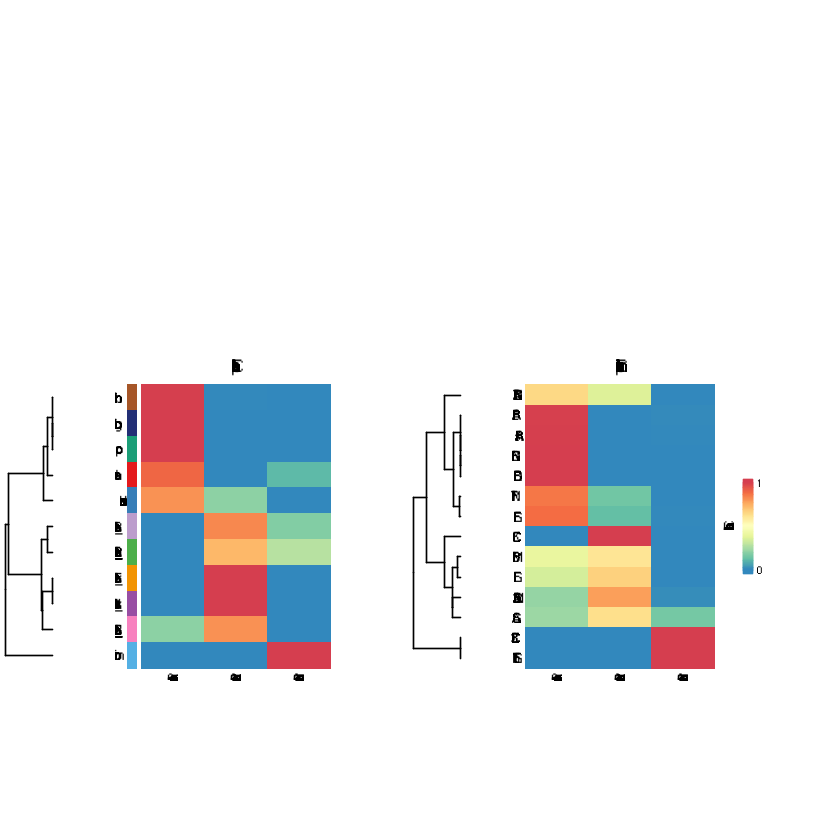

In [16]:
#Calculate the aggregated cell-cell communication network
cellchat <- aggregateNet(cellchat)

#Identify global communication patterns to explore how multiple cell types and signaling pathways coordinate together
nPatterns = 3  #default, set to 3
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "outgoing", k = nPatterns)
cellchat <- identifyCommunicationPatterns(cellchat, pattern = "incoming", k = nPatterns)

In [17]:
# saveRDS(cellchat, 
#         file = glue("RNA_FINAL-{condition}-type_{type}-trim_{trim}_cellchat.rds"))

saveRDS(cellchat, 
        file = "cellchat_before_pooling.rds")

write.csv(cellchat@net$weight, "cellchat_before_pooling.csv")

print("\n\n\n")
print(paste0("Condition: ", condition))
print(paste0("Type: ", type))
print(paste0("Trim: ", trim))
print("DONE!")

[1] "\n\n\n"
[1] "Condition: CON"  "Condition: PTSD" "Condition: MDD" 
[1] "Type: triMean"
[1] "Trim: 0.1"
[1] "DONE!"


# -------------

In [10]:
library(ComplexHeatmap)
library(circlize)
library(circlize)
library(colorspace)
library(ggplot2)

In [12]:
# inhibitory_celltypes <- c('Inh KCNG1', 'Inh LAMP5', 'Inh PVALB', 'Inh SST', 'Inh VIP')
# excitatory_celltypes <- c('Exc CUX2', 'Exc FEZF2', 'Exc OPRK1', 'Exc RORB')
# support_celltypes <- c('Astro', 'Endo', 'MG', 'Oligo', 'OPC')
cellchat = readRDS(
plot = my_merged_river(cellchat, "outgoing", 'AUD', inhibitory_celltypes, excitatory_celltypes, support_celltypes)

ERROR: Error in eval(expr, envir, enclos): object 'cellchat' not found
